# Import libraries

In [46]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2, mobilenet_v2
from tensorflow.keras.losses import CategoricalCrossentropy
import matplotlib as mpl 
import matplotlib.pyplot as plt


# Load image

In [47]:
image_path = 'Camel.jpg'
image_raw = tf.io.read_file(image_path)
image = tf.image.decode_image(image_raw)

# Load pretrained model and predict

In [48]:
model = MobileNetV2(include_top=True, weights='imagenet')
model.trainable = False

decode_predictions = mobilenet_v2.decode_predictions

# Resize and preprocess for MobileNet

In [49]:
def preprocess(image):
    image = tf.cast(image, tf.float32)
    image = tf.image.resize(image, (224, 224))
    image = mobilenet_v2.preprocess_input(image)
    image =image[None, ...]
    return image

def get_imagenet_label(probs):
    return decode_predictions(probs, top=1)[0][0]

In [50]:
image = preprocess(image)

original_pred = model.predict(image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 764ms/step


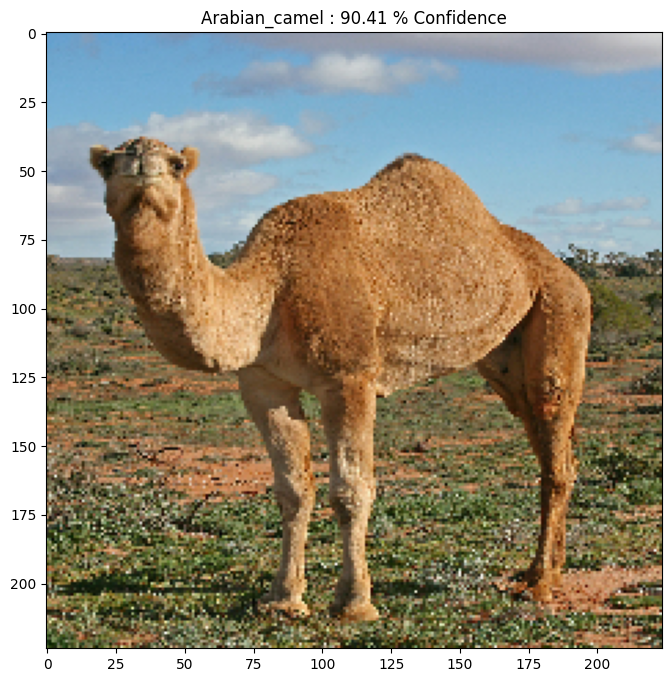

In [51]:
plt.figure()
plt.imshow(image[0] * 0.5 + 0.5)
_, image_class, class_confidence = get_imagenet_label(original_pred)
plt.title('{} : {:.2f} % Confidence'.format(image_class, class_confidence*100))
plt.show()

In [52]:
def display_images(image, description):
    _, label, confidence = get_imagenet_label(model.predict(image))
    plt.Figure()
    plt.imshow(image[0] * 0.5 + 0.5)
    plt.title('{} \n {} : {:.2f} % Confidence' .format(description, label, confidence*100))
    plt.show()

# Add Gaussian noise

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


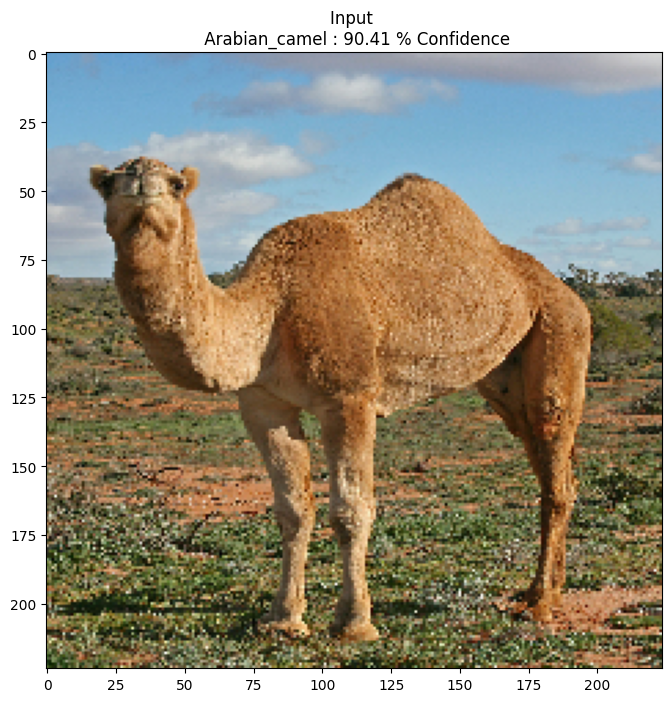

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


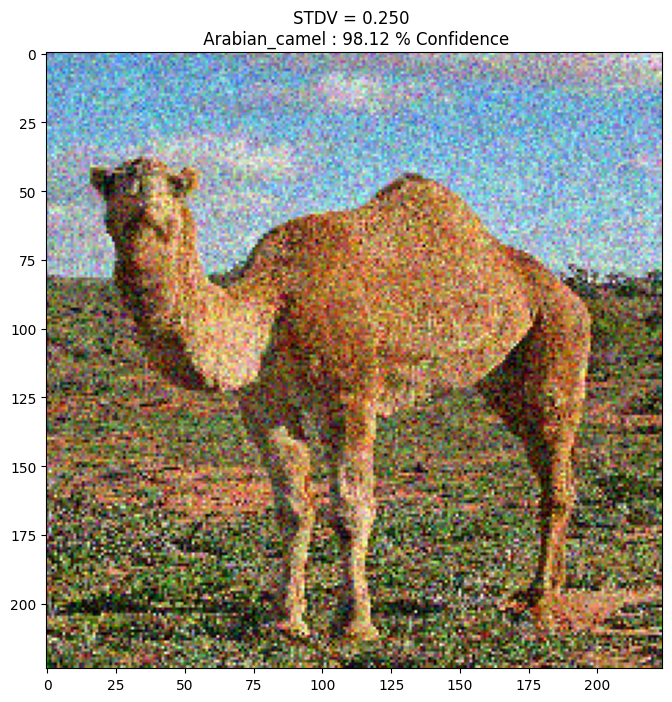

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


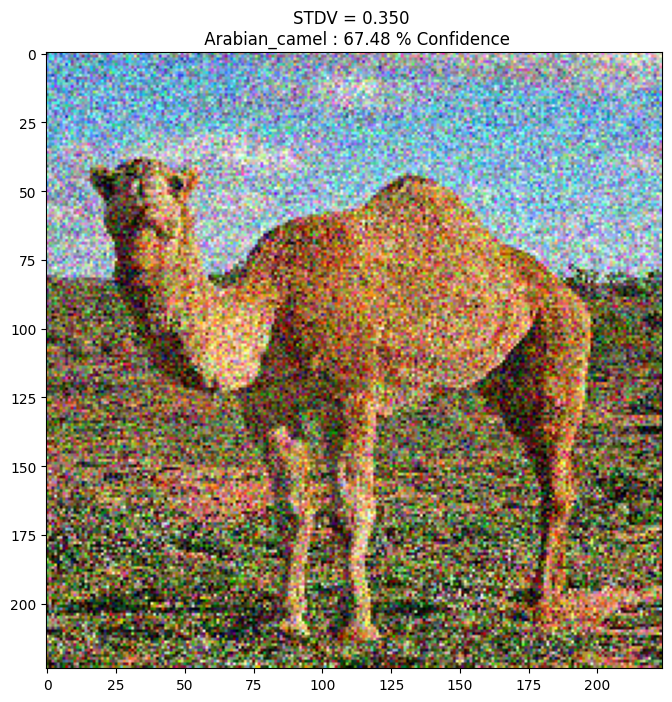

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step


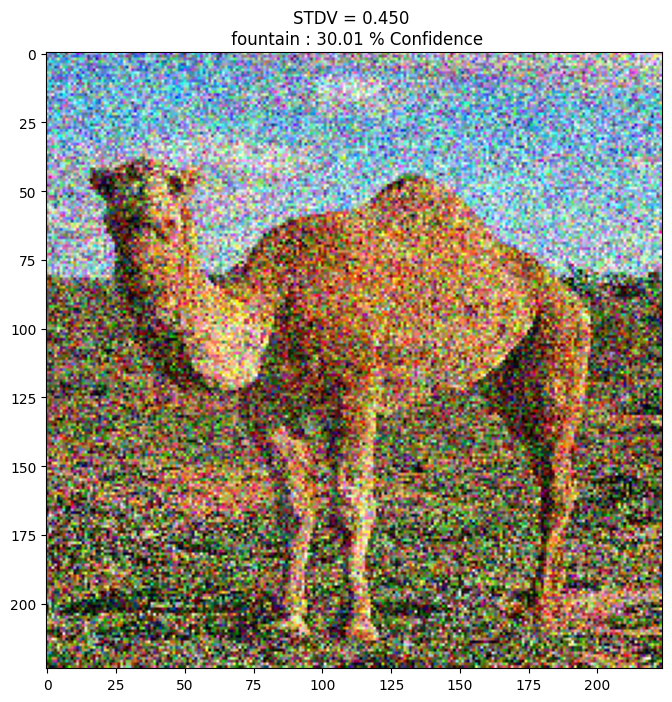

In [53]:
def add_gaussian_noise(img, stddev, mean=0.0):
    noise = tf.random.normal(shape=tf.shape(img), mean=mean, stddev=stddev, dtype=tf.float32)
    noisy_img = img + noise
    return tf.clip_by_value(noisy_img, -1.0, 1.0)  # keep values in [-1, 1] for MobileNet

stdvs = [0, 0.25, 0.35, 0.45]
descriptions = [('STDV = {:0.3f}'.format(stdv) if stdv else 'Input') for stdv in stdvs]

for i, stdv in enumerate(stdvs):
    noisy_image = add_gaussian_noise(image, stdv)

    noisy_pred = model.predict(noisy_image)
    display_images(noisy_image, descriptions[i])